# Classification Modeling

Our objective is to identify the classification model that best predicts the primary cause of failure, `c78`, with respect to several evaluation metrics.

The final performance for each model is given below.

**Dummy Classifier**\
Precision Macro: 0.0027+0.0000\
Recall Macro: 0.0200+0.0000\
F1 Macro: 0.0047+0.0000\
F1 Micro: 0.1326+0.0000


**Naive Bayes**\
Precision Macro: 0.0027+0.0000\
Recall Macro: 0.0200+0.0000\
F1 Macro: 0.0047+0.0000\
F1 Micro: 0.1326+0.0000


**K-Nearest Neighbor**\
Precision Macro: 0.2356+0.0423\
Recall Macro: 0.1337+0.0067\
F1 Macro: 0.1306+0.0092\
F1 Micro: 0.3153+0.0098


**Decision Tree**\
Precision Macro: 0.3611+0.0058\
Recall Macro: 0.3611+0.0058\
F1 Macro: 0.1230+0.0067\
F1 Micro: 0.3611+0.0058


**SVM**\
Precision Macro: 0.0453+0.0150\
Recall Macro: 0.0212+0.0021\
F1 Macro: 0.0181+0.0029\
F1 Micro: 0.1487+0.0041

Notes
- I am unsure why the Dummy Classifier deviated from Lindsey's results and is equal to the Naive Bayes. I re-ran Lindsey's notebooks though and got these same values so possibly she completed the Dummy Classifier prior to finalizing `Encoding_Feature.csv`
- The Decison Tree and SVM scores are from an earlier run where I intentionally used a subset of the features and both still took a while to train. I will attempt to fit them again with all the features but it might prove infeasible.

# Dummy Classifier

In [ ]:
#| hide
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

First, we will fit a dummy model to act as a baseline.

In [ ]:
# Changing the read file location to the location of the file
df = pd.read_csv('../data/cleaned-data/Encoded_Features.csv', index_col=0)

In [ ]:
df.shape[0]

21264

In [ ]:
# Separating the dependent and independent variable
y = df['c78'] #labels
X = df.drop('c78', axis=1) #features

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.2)

In [ ]:
strategies = ['most_frequent', 'stratified', 'uniform']
  
test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant ='M')
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
        
    dclf.fit(X_train, y_train)
    y_pred = dclf.predict(X_test)    
    score = dclf.score(X_test, y_test)
    test_scores.append(score)
    #print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))
    
dclf = DummyClassifier(strategy = 'most_frequent', random_state = 0)
scoring = ['precision_macro', 'recall_macro', 'f1_macro','f1_micro','accuracy']
scores_dclf = cross_validate(dclf, X, y,cv=10, scoring=scoring)
sorted(scores_dclf.keys())

print("%0.4f+%0.4f" % (scores_dclf['test_precision_macro'].mean(), scores_dclf['test_precision_macro'].std()))
print("%0.4f+%0.4f" % (scores_dclf['test_recall_macro'].mean(), scores_dclf['test_recall_macro'].std()))
print("%0.4f+%0.4f" % (scores_dclf['test_f1_macro'].mean(), scores_dclf['test_f1_macro'].std()))
print("%0.4f+%0.4f" % (scores_dclf['test_f1_micro'].mean(), scores_dclf['test_f1_micro'].std()))

0.0027+0.0000
0.0200+0.0000
0.0047+0.0000
0.1326+0.0000


[Text(0.5, 0, 'Dummy Strategy'), Text(0, 0.5, 'Accuracy')]

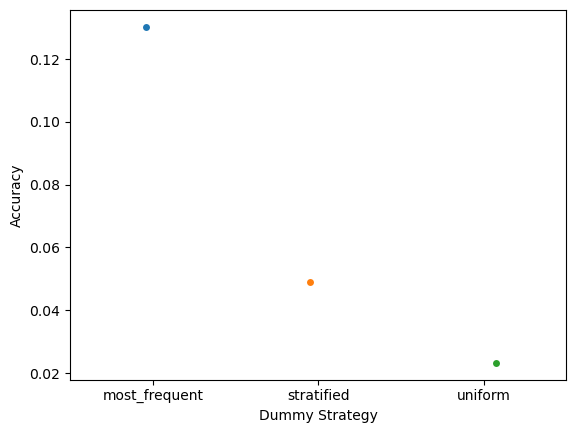

In [ ]:
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Dummy Strategy', ylabel ='Accuracy')

# Naive Bayes

In [ ]:
#| hide
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn import naive_bayes

Next, we will try a Naive Bayes model.

In [ ]:
# Read dataset to pandas dataframe
irisdata = pd.read_csv('../data/cleaned-data/Encoded_Features.csv', index_col=0)

In [ ]:
X = irisdata.drop('c78', axis=1)
y = irisdata['c78']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.model_selection import GridSearchCV
Naive = naive_bayes.MultinomialNB()

param_grid = {'alpha': [100000, 500000, 1000000]}
#use gridsearch to test all values for n_neighbors
nb_gscv = GridSearchCV(Naive, param_grid, cv=10, verbose=2)
#fit model to data
nb_gscv.fit(X, y)

In [ ]:
nb_gscv.best_params_

{'alpha': 100000}

In [ ]:
Naive = naive_bayes.MultinomialNB(alpha=1000000)
Naive.fit(X_train,y_train)# predict the labels on validation dataset
predictions_NB = Naive.predict(X_test)# Use accuracy_score function to get the accuracy

In [ ]:
scoring = ['precision_macro', 'recall_macro', 'f1_macro','f1_micro','accuracy']
scores_nb = cross_validate(Naive, X, y, cv=10, scoring = scoring, verbose=2)

In [ ]:
sorted(scores_nb.keys())
scores_nb

{'fit_time': array([29.40935636, 29.29487848, 29.02299118, 29.67805696, 30.41820049,
        27.21647263, 28.4566586 , 28.28060436, 27.96033669, 27.95482945]),
 'score_time': array([0.12052965, 0.11404657, 0.1136179 , 0.11438704, 0.11736965,
        0.11576581, 0.11674356, 0.11988378, 0.11960602, 0.11597013]),
 'test_precision_macro': array([0.00265162, 0.00265162, 0.00265162, 0.00265162, 0.00265287,
        0.00265287, 0.00265287, 0.00265287, 0.00265287, 0.00265287]),
 'test_recall_macro': array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]),
 'test_f1_macro': array([0.00468244, 0.00468244, 0.00468244, 0.00468244, 0.00468439,
        0.00468439, 0.00468439, 0.00468439, 0.00468439, 0.00468439]),
 'test_f1_micro': array([0.1325811 , 0.1325811 , 0.1325811 , 0.1325811 , 0.13264346,
        0.13264346, 0.13264346, 0.13264346, 0.13264346, 0.13264346]),
 'test_accuracy': array([0.1325811 , 0.1325811 , 0.1325811 , 0.1325811 , 0.13264346,
        0.13264346, 0.13264346, 0.132643

In [ ]:
print("%0.4f+%0.4f" % (scores_nb['test_precision_macro'].mean(), scores_nb['test_precision_macro'].std()))
print("%0.4f+%0.4f" % (scores_nb['test_recall_macro'].mean(), scores_nb['test_recall_macro'].std()))
print("%0.4f+%0.4f" % (scores_nb['test_f1_macro'].mean(), scores_nb['test_f1_macro'].std()))
print("%0.4f+%0.4f" % (scores_nb['test_f1_micro'].mean(), scores_nb['test_f1_micro'].std()))

0.0027+0.0000
0.0200+0.0000
0.0047+0.0000
0.1326+0.0000


# K - Nearest Neighhbor

In [ ]:
#| hide
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('../data/cleaned-data/Encoded_Features.csv',index_col=0)
data.head()

X = data.drop('c78', axis=1)
y = data['c78']
    
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size = 0.2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.29579120620738303

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 10 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.23883404 0.22708039 0.24494593 0.23601316 0.23941675 0.23800564
 0.23565381 0.23330198 0.22483537 0.23377234]
cv_scores mean:0.2351859419787961


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10, verbose=10)
#fit model to data
knn_gscv.fit(X, y)

In [ ]:
knn_gscv.best_params_
#knn_gscv.best_score_

{'n_neighbors': 45}

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=45)
#train model with cv of 10 

In [ ]:
scoring = ['precision_macro', 'recall_macro', 'f1_macro','f1_micro','accuracy']
scores_knn = cross_validate(knn_cv, X, y, cv=10, scoring = scoring)
#print each cv score (accuracy) and average them
sorted(scores_knn.keys())
scores_knn

{'fit_time': array([0.85636282, 0.49874997, 0.5051713 , 0.48534489, 0.4949882 ,
        0.49622059, 0.49663901, 0.48606586, 0.49530411, 0.47655201]),
 'score_time': array([1.98693371, 2.40405393, 2.93795228, 2.62931323, 2.09334898,
        2.16602802, 2.09480214, 2.35734534, 2.1879952 , 2.37793231]),
 'test_precision_macro': array([0.19997276, 0.31106627, 0.26910541, 0.21671609, 0.20075895,
        0.26377379, 0.15877166, 0.26623614, 0.25203867, 0.21710113]),
 'test_recall_macro': array([0.12133596, 0.1473856 , 0.13502954, 0.13275619, 0.13448904,
        0.12994185, 0.12763656, 0.14093678, 0.13240046, 0.13547305]),
 'test_f1_macro': array([0.11585435, 0.15030466, 0.13415572, 0.12612722, 0.13056661,
        0.12777295, 0.12000804, 0.13946819, 0.12962251, 0.13253774]),
 'test_f1_micro': array([0.29384109, 0.32769158, 0.32346027, 0.31076634, 0.31608655,
        0.31984948, 0.31420508, 0.31420508, 0.30573848, 0.32690499]),
 'test_accuracy': array([0.29384109, 0.32769158, 0.32346027, 0.3107

In [ ]:
print("%0.4f+%0.4f" % (scores_knn['test_accuracy'].mean(), scores_knn['test_accuracy'].std()))
print("%0.4f+%0.4f" % (scores_knn['test_precision_macro'].mean(), scores_knn['test_precision_macro'].std()))
print("%0.4f+%0.4f" % (scores_knn['test_recall_macro'].mean(), scores_knn['test_recall_macro'].std()))
print("%0.4f+%0.4f" % (scores_knn['test_f1_macro'].mean(), scores_knn['test_f1_macro'].std()))
print("%0.4f+%0.4f" % (scores_knn['test_f1_micro'].mean(), scores_knn['test_f1_micro'].std()))

0.3153+0.0098
0.2356+0.0423
0.1337+0.0067
0.1306+0.0092
0.3153+0.0098


In [ ]:
import matplotlib.pyplot as plt 
error_rate = []
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

In [ ]:
#Best -> k = 31 -> err_rate = 0.6762285445567835
error_rate.index(min(error_rate))
error_rate[30]

0.6762285445567835

[<matplotlib.lines.Line2D>]

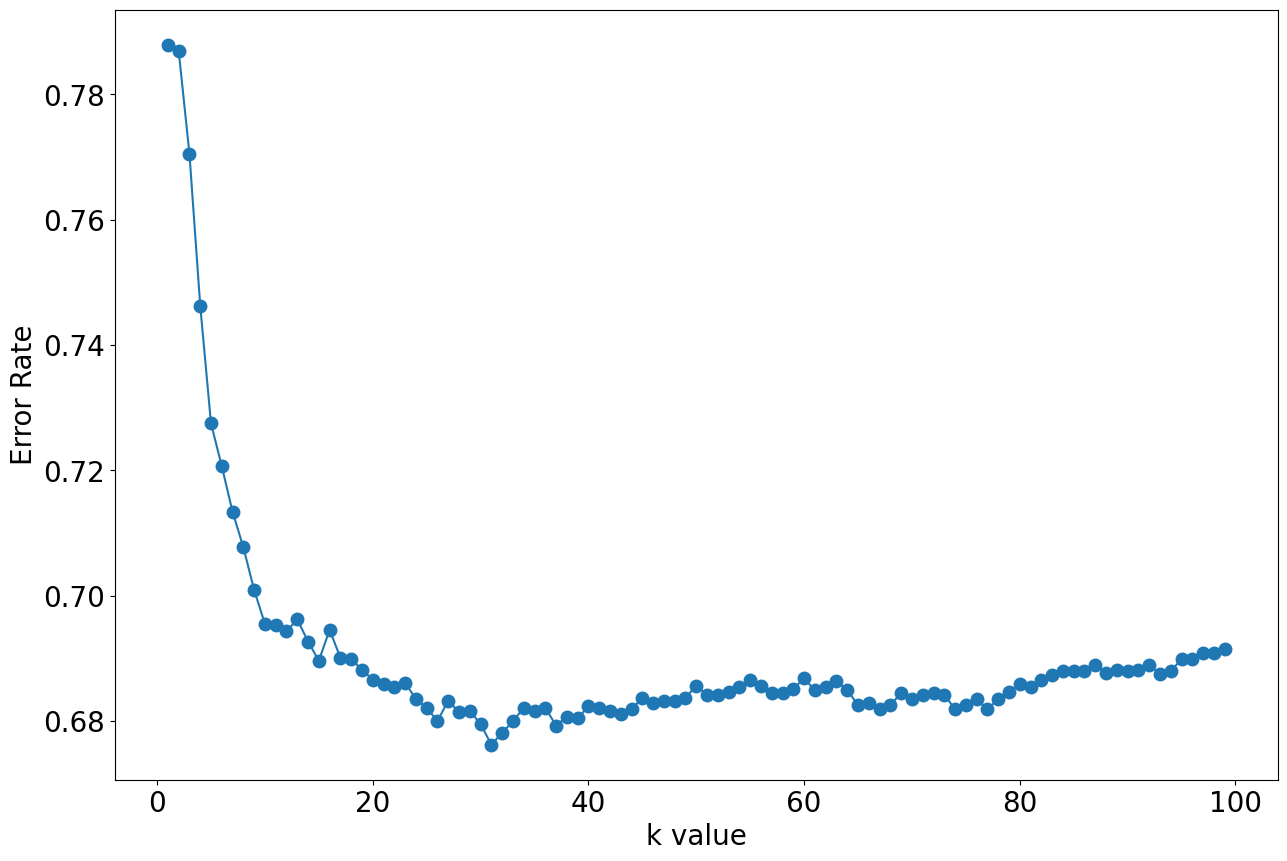

In [ ]:
fig = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
plt.xlabel("k value")
plt.ylabel("Error Rate")
plt.plot(range(1,100),error_rate, marker='o', markersize=9)

# Decision Tree

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv('../data/cleaned-data/Encoded_Features.csv',index_col=0) 
dataset

,c144,c23,c24,c25,c27,c13,c102,c106,c41,c49,c50,c52,c53,c56,c59,c78,c80,c96,c109
0,10,127,705,145,24,19,0,1,1,4,7,1,5,230,21,32,30,31,1
1,10,264,1763,607,19,54,0,1,3,4,41,6,135,2882,12,94,33,21,1
2,10,315,934,241,9,0,0,1,1,4,11,12,145,335,0,103,8,40,1
3,10,264,1752,606,5,0,0,0,3,2,31,9,1256,3044,0,40,30,7,1
4,16,128,920,167,4,81,0,1,5,2,25,12,490,3439,19,4,30,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22784,15,23,1488,483,9,10,0,2,1,8,44,13,0,691,12,54,30,30,1
22785,15,264,1840,619,5,10,3,2,3,8,32,13,200,496,12,54,30,30,3
22786,7,207,255,75,29,10,4,1,8,8,24,9,1360,2211,12,40,30,19,1
22787,10,148,69,34,4,50,0,1,1,8,14,13,145,190,7,75,12,16,1


In [ ]:
from sklearn.model_selection import train_test_split
X = dataset.copy().drop(columns=['c78'])
y = dataset['c78']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
targets = dataset['c78'].unique().tolist()
targets = [str(x) for x in targets]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dTree = DecisionTreeClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': np.arange(1, 100)}
#use gridsearch to test all values for n_neighbors
dTree_gscv = GridSearchCV(dTree, param_grid, cv=10, verbose=2)
#fit model to data
dTree_gscv.fit(X, y)

In [ ]:
dTree_gscv.best_params_

{'max_depth': 10}

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import numpy as np
#create a new KNN model
dTree = DecisionTreeClassifier(max_depth = 10)

In [ ]:
#train model with cv of 10 
scoring = ['precision_macro', 'recall_acro', 'f1_macro','f1_micro','accuracy']
scores_dt = cross_validate(dTree, X, y, cv=10, scoring = scoring)
#print each cv score (accuracy) and average them
sorted(scores_dt.keys())
print("%0.4f+%0.4f" % (scores_dt['test_precision_macro'].mean(), scores_dt['test_precision_macro'].std()))
print("%0.4f+%0.4f" % (scores_dt['test_recall_macro'].mean(), scores_dt['test_recall_macro'].std()))
print("%0.4f+%0.4f" % (scores_dt['test_f1_macro'].mean(), scores_dt['test_f1_macro'].std()))
print("%0.4f+%0.4f" % (scores_dt['test_f1_micro'].mean(), scores_dt['test_f1_micro'].std()))

0.3611+0.0058
0.3611+0.0058
0.1230+0.0067
0.3611+0.0058


# SVM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn.svm import SVC

In [ ]:
# Assign colum names to the dataset
colnames = ['c144','c23','c24','c25','c27','c13','c102','c106','c41','c49', 'c50', 'c52', 'c80', 'c96', 'c109','c78']

# Read dataset to pandas dataframe
irisdata = pd.read_csv('../data/cleaned-data/Encoded_Features.csv',usecols=colnames)

In [ ]:
X = irisdata.drop('c78', axis=1)
y = irisdata['c78']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
clf = SVC(kernel = 'poly', degree = 8)
#clf.fit(X_train, y_train)
scoring = ['precision_macro', 'recall_macro', 'f1_macro','f1_micro','accuracy']
scores_res = cross_validate(clf, X, y, cv=10, scoring = scoring)

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = SVC(kernel = 'poly', degree = 2)

param_grid = {'degree': [2, 4, 10]}
#use gridsearch to test all values for n_neighbors
svm_gscv = GridSearchCV(clf, param_grid, cv=2)
#fit model to data
svm_gscv.fit(X, y)

In [ ]:
sorted(scores_res.keys())
scores_res

{'fit_time': array([1889.22326255, 3645.23735523, 1848.76933146, 1988.86997342,
        1838.83641362, 1711.68622732, 1769.97253346, 1729.35280895,
        1772.21598983, 1696.40208578]),
 'score_time': array([11.10421562, 47.5643127 , 11.43277121, 12.20550013, 12.46886802,
        12.16364694, 11.61115575, 11.66941142, 11.45319939, 12.55381179]),
 'test_precision_macro': array([0.03526325, 0.04824987, 0.08318548, 0.04999466, 0.05392378,
        0.03490309, 0.03320958, 0.04777263, 0.03851724, 0.02794099]),
 'test_recall_macro': array([0.02224964, 0.02135871, 0.02413596, 0.0240558 , 0.01957375,
        0.01787839, 0.01932417, 0.01948561, 0.0238185 , 0.02029652]),
 'test_f1_macro': array([0.01864003, 0.0190541 , 0.0225871 , 0.02192672, 0.01617443,
        0.01367981, 0.01549697, 0.01593496, 0.02125461, 0.0162016 ]),
 'test_f1_micro': array([0.14918824, 0.14962703, 0.15313734, 0.15577007, 0.14655551,
        0.14216762, 0.14787187, 0.15050461, 0.15006582, 0.14223003]),
 'test_accuracy': a

In [ ]:
print("%0.4f+%0.4f" % (scores_res['test_accuracy'].mean(), scores_res['test_accuracy'].std()))
print("%0.4f+%0.4f" % (scores_res['test_precision_macro'].mean(), scores_res['test_precision_macro'].std()))
print("%0.4f+%0.4f" % (scores_res['test_recall_macro'].mean(), scores_res['test_recall_macro'].std()))
print("%0.4f+%0.4f" % (scores_res['test_f1_macro'].mean(), scores_res['test_f1_macro'].std()))
print("%0.4f+%0.4f" % (scores_res['test_f1_micro'].mean(), scores_res['test_f1_micro'].std()))

0.1487+0.0041
0.0453+0.0150
0.0212+0.0021
0.0181+0.0029
0.1487+0.0041


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))